# Trip Advisor Hotel Review

### Importing the necessary libraries

In [5]:
# importing all the necessary libraries required for our sentiment ananlysis
import pandas as pd
import numpy as np
import re
import nltk
import keras
nltk.download('punkt')

import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
# Mounting to connect to our google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Data Understanding

In [6]:
# Reading the dataset from our drive dataset
df = pd.read_csv("/content/drive/MyDrive/AI Datasets/Assignment/RNN Dataset/tripadvisor_hotel_reviews.csv")

In [ ]:
# Displaing our first top 10 dataset
df.head(10)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
5,love monaco staff husband stayed hotel crazy w...,5
6,"cozy stay rainy city, husband spent 7 nights m...",5
7,"excellent staff, housekeeping quality hotel ch...",4
8,"hotel stayed hotel monaco cruise, rooms genero...",5
9,excellent stayed hotel monaco past w/e delight...,5


In [ ]:
# Showing the info of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [ ]:
# Calculating and adding the count of missing values from eachh columns
df.isnull().sum()

Review    0
Rating    0
dtype: int64

In [ ]:
# Dropping if any null values are presented
df.dropna()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [ ]:
# Checking the rows and columns of the dataset
df.shape

(20491, 2)

In [7]:
# Checking if there is any duplicate rows in dataset
df.duplicated().any()

False

In [ ]:
#Checking if there is any empty string in dataset
empty = []
for i, Review, Rating in df.itertuples():
  if type(Review) == str:
    if Review.isspace():
      empty.append(i)

print(f"There are total {len(empty)} empty strings as review.")

There are total 0 empty strings as review.


In [ ]:
# Counting the value and seeing the unique values of the column called reviews
df['Rating'].value_counts()

Rating
5    9054
4    6039
3    2184
2    1793
1    1421
Name: count, dtype: int64

In [ ]:
# Storing the word count of reviews column and adding theminto new column called Word_count
df['Word_count']= df['Review'].map(lambda x: len(x.split()))

In [ ]:
df.head()

,Review,Rating,Word_count
0,nice hotel expensive parking got good deal sta...,4,87
1,ok nothing special charge diamond member hilto...,2,250
2,nice rooms not 4* experience hotel monaco seat...,3,217
3,"unique, great stay, wonderful time hotel monac...",5,89
4,"great stay great stay, went seahawk game aweso...",5,191


### Data Visualization

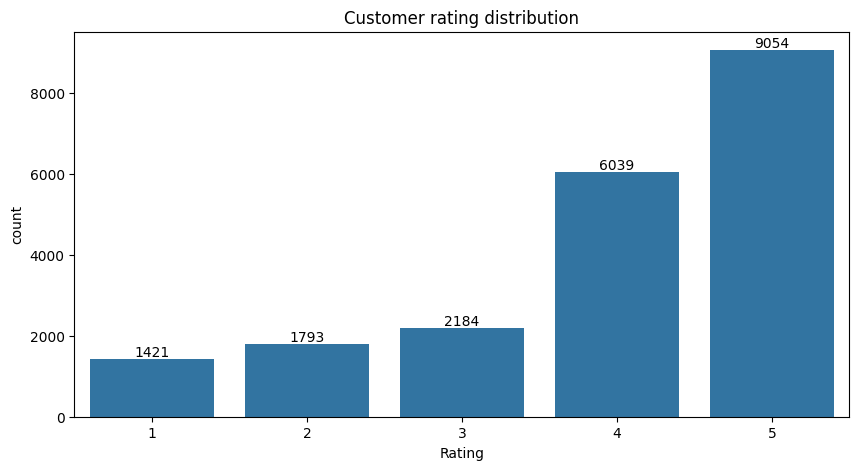

In [ ]:
# Visualizing the reviews rating
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=df, x='Rating')
ax.bar_label(ax.containers[0])
ax.set_title('Customer rating distribution')
plt.show()

<Axes: xlabel='Rating', ylabel='Word_count'>

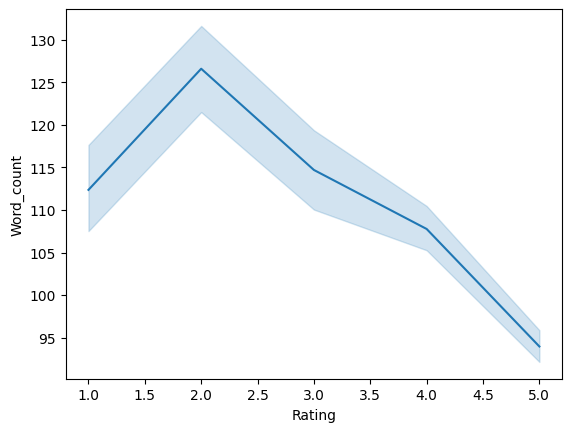

In [ ]:
# Lineplot for the rating per the Word_count
sns.lineplot(x='Rating', data=df, y='Word_count')

In [ ]:
# Importing textblob for classification of polarty and subjectivity
from textblob import TextBlob

In [ ]:
# Checking the text nature(negative,positive and neutral)
def polarity(text):
    blob= TextBlob(text)
    blob.sentiment
    polarity= blob.sentiment.polarity

    return polarity

In [ ]:
# Checking whic text expresses opinion,emotions or personal viewpoints
def subjectivity(text):
    blob= TextBlob(text)
    blob.sentiment
    subjectivity= blob.sentiment.subjectivity
    return subjectivity

In [ ]:
# Calculating the sentiment polarity and subjectivity and storing
df['Polarity'] = df['Review'].apply(polarity)
df['Subjectivity'] = df['Review'].apply(subjectivity)
df

,Review,Rating,Word_count,Polarity,Subjectivity
0,nice hotel expensive parking got good deal sta...,4,87,0.208744,0.687000
1,ok nothing special charge diamond member hilto...,2,250,0.214923,0.495009
2,nice rooms not 4* experience hotel monaco seat...,3,217,0.294420,0.605208
3,"unique, great stay, wonderful time hotel monac...",5,89,0.504825,0.691228
4,"great stay great stay, went seahawk game aweso...",5,191,0.384615,0.629396
...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,109,0.221729,0.508586
20487,great location price view hotel great quick pl...,4,39,0.503704,0.622222
20488,"ok just looks nice modern outside, desk staff ...",2,63,0.171220,0.524304
20489,hotel theft ruined vacation hotel opened sept ...,1,781,0.122573,0.533441


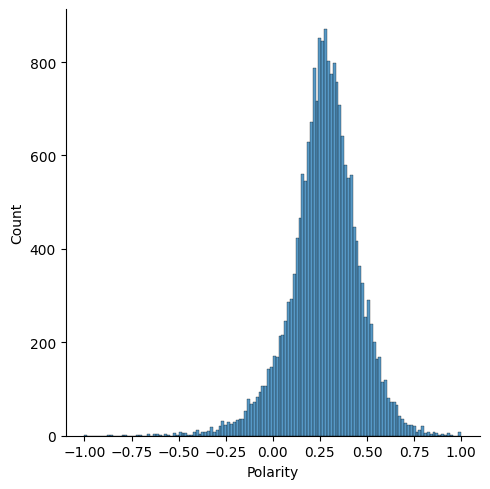

In [ ]:
# Displalying the polarity column using a displot
sns.displot(df['Polarity'])

<Axes: xlabel='Rating', ylabel='Polarity'>

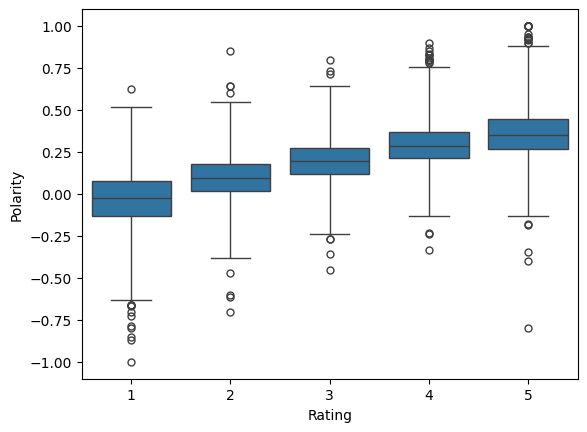

In [ ]:
sns.boxplot(x='Rating',y='Polarity', data=df, whis=2.5, fliersize= 5)

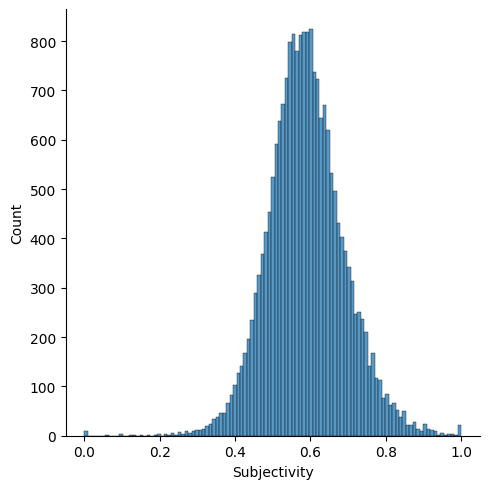

In [ ]:
sns.displot(df['Subjectivity'])

<Axes: xlabel='Rating', ylabel='Subjectivity'>

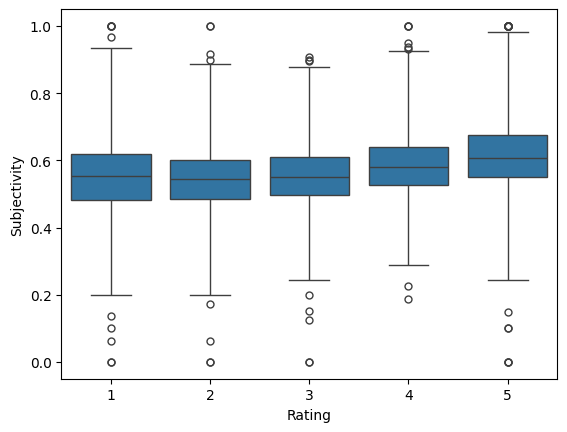

In [ ]:
sns.boxplot(x='Rating',y='Subjectivity', data=df, whis=2.5, fliersize= 5)

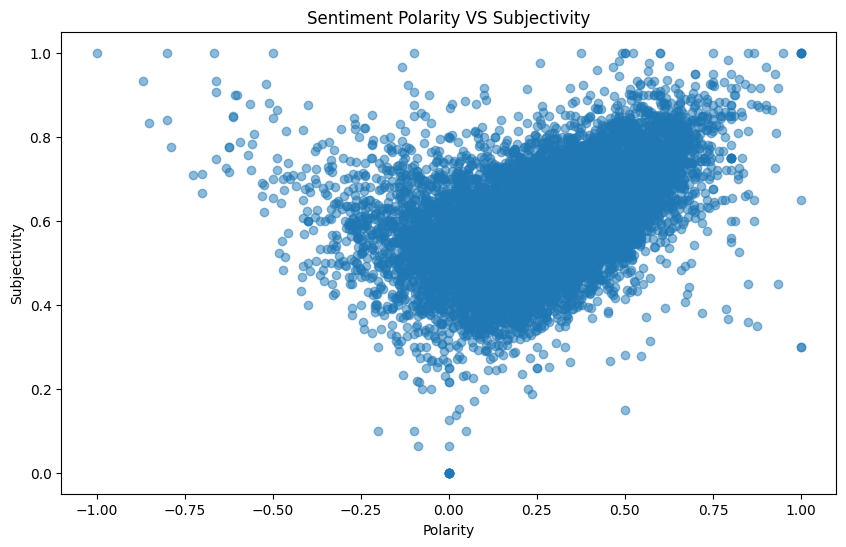

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df['Polarity'], df['Subjectivity'],alpha=0.5)
plt.title('Sentiment Polarity VS Subjectivity')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
# Seeing the high probability of occurance of the words of the review column and analyzig the initial 2000
rev= " ".join([review for review in df['Review']])
rev[:2000]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,   ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike 

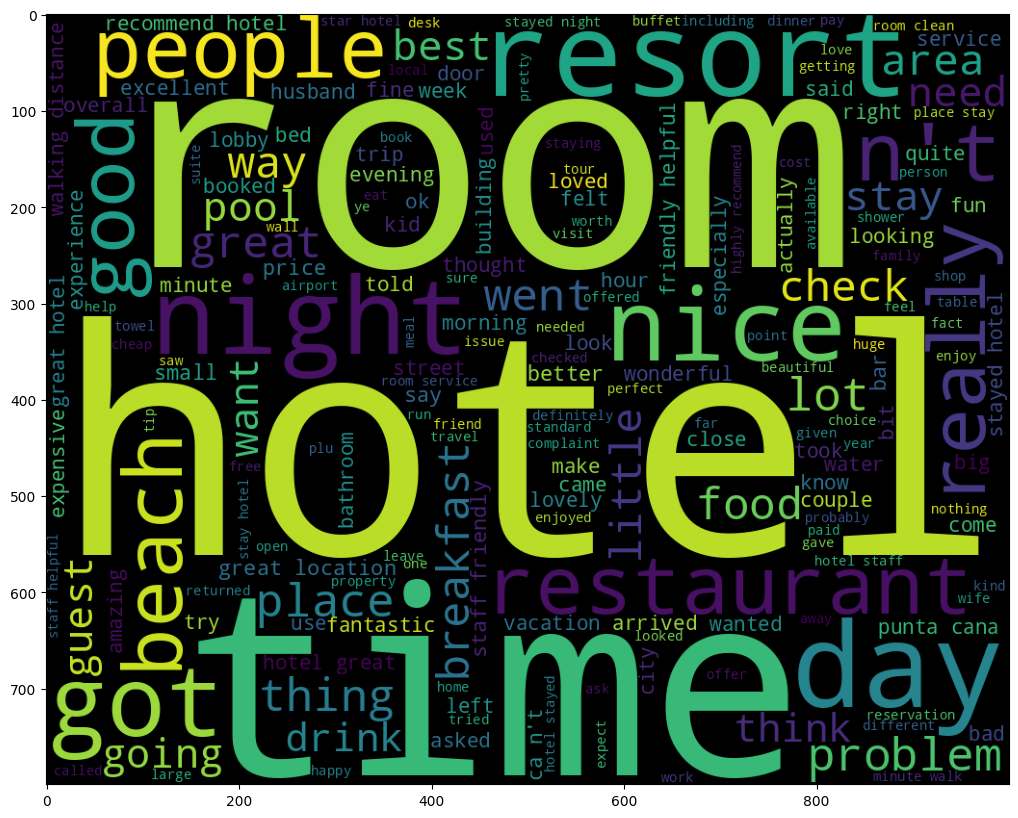

In [ ]:
# Importing the wordcloud library to display the repetive words
from wordcloud import WordCloud
plt.figure(figsize=(15,10))
wc= WordCloud(max_words=200,height= 800, width=1000 ,background_color='black').generate(rev)
plt.imshow(wc)

### Text Processing

In [ ]:
# Removing the emoji
def remove_emoji(string):
  """
  This function will replace the emoji in string with whitespace
  """
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"
                           u"\U0001F300-\U0001F5FF"
                           u"\U0001F680-\U0001F6FF"
                           u"\U0001F1E0-\U0001F1FF"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r' ', string)

In [ ]:
teststring ="Hello @Radhika 😁. This ^&*!@ is a te@t sentence"
test =remove_emoji(teststring)
test

'Hello @Radhika  . This ^&*!@ is a te@t sentence'

In [ ]:
df['Review'] = df['Review'].apply(remove_emoji)

In [ ]:
# Removing the unwanted text
def remove_unwanted_text(text):
  cleaned_text = re.sub("#[A-Za-z0-9_]+"," ", text)
  cleaned_text = re.sub("[^0-9A-Za-z ]", " " , text)
  cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
  cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
  cleaned_text = remove_emoji(cleaned_text)
  cleaned_text = cleaned_text.replace('  ',"")
  words = cleaned_text.split()
  cleaned_words = [words[i] for i in range(len(words)) if i == 0 or words[i] != words[i-1]]
  cleaned_text = ' '.join(cleaned_words)
  return cleaned_text

In [ ]:
unwanted_text = "Hello @Radhika 👋🏾, still on up for the dinner??  #DinnerNight #friday 🍱512(*&(*^&!&@#!) )"
test = remove_unwanted_text(unwanted_text)
test

'Hello Radhika still on up for the dinner DinnerNight friday 512'

In [ ]:
df['Review'] = df['Review'].apply(remove_unwanted_text)

In [ ]:
# Removing urls
def remove_urls(text):
  """
  This function will try to remove URL present in out dataset and replace it with space using regex library.
  Input Args:
  text: strings of text that may contain URLs.
  Output Args:
  text: URLs replaces with text
  """
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
  return url_pattern.sub(r'', text)

In [ ]:
unwanted_url = "Click on this link to open Canvas https://canvas.wlv.ac.uk/"
test = remove_urls(unwanted_url)
test

'Click on this link to open Canvas '

In [ ]:
df['Review'] = df['Review'].apply(remove_urls)

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

# Initializing the wordnet lemmatizer and
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Removing stop words and lemmatize text using function
def preprocess_text(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    return ' '.join(lemmatized_words)

# Applying the preprocessing to the 'Reviews'
df['Processed_Reviews'] = df['Review'].apply(preprocess_text)

# Displaying the updated dataframe
print(df.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                              Review  Rating  Word_count  \
0  nice hotel expensive parking got good deal sta...       4          87   
1  ok nothing special charge diamond member hilto...       2         250   
2  nice rooms not 4 experience hotel monaco seatt...       3         217   
3  unique great stay wonderful time hotel monaco ...       5          89   
4  great stay great stay went seahawk game awesom...       5         191   

   Polarity  Subjectivity                                  Processed_Reviews  
0  0.208744      0.687000  nice hotel expensive parking got good deal sta...  
1  0.214923      0.495009  ok nothing special charge diamond member hilto...  
2  0.294420      0.605208  nice room 4 experience hotel monaco seattle go...  
3  0.504825      0.691228  unique great stay wonderful time hotel monaco ...  
4  0.384615      0.629396  great stay great stay went seahawk game awesom...  


In [ ]:
from nltk.stem import PorterStemmer
from tqdm import tqdm

stemmer = PorterStemmer()

# Iterating through each reviews and updating
for i in tqdm(range(len(df))):
    review = df['Processed_Reviews'][i]
    stemmed_review = ' '.join([stemmer.stem(word) for word in review.split()])
    df['Processed_Reviews'][i] = stemmed_review

Streaming output truncated to the last 5000 lines.
 74%|███████▎  | 15093/20491 [01:37<00:30, 175.54it/s]<ipython-input-42-21539a1f8a60>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Processed_Reviews'][i] = stemmed_review
<ipython-input-42-21539a1f8a60>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Processed_Reviews'][i] = stemmed_review
<ipython-input-42-21539a1f8a60>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

### Tokenization

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Processed_Reviews'])

In [ ]:
# seeing the number of unique words in all the reviews combined
vocab_size = len(tokenizer.word_index)
print(f'There are total {vocab_size} unique words present')

There are total 66634 unique words present


In [ ]:
# Replacing each words in review with respective token id
sequences = tokenizer.texts_to_sequences(df['Processed_Reviews'])

In [ ]:
indexing = tokenizer.word_index
indexing

{'hotel': 1,
 'room': 2,
 'stay': 3,
 'great': 4,
 'nt': 5,
 'good': 6,
 'staff': 7,
 'night': 8,
 'locat': 9,
 'nice': 10,
 'day': 11,
 'time': 12,
 'clean': 13,
 'servic': 14,
 'walk': 15,
 'restaur': 16,
 'beach': 17,
 'place': 18,
 'breakfast': 19,
 'like': 20,
 'food': 21,
 'resort': 22,
 'pool': 23,
 'help': 24,
 'bed': 25,
 'realli': 26,
 'love': 27,
 'area': 28,
 'peopl': 29,
 'friendli': 30,
 'want': 31,
 'excel': 32,
 'book': 33,
 'small': 34,
 'recommend': 35,
 'bar': 36,
 'littl': 37,
 'got': 38,
 'view': 39,
 'look': 40,
 'bathroom': 41,
 '2': 42,
 'best': 43,
 'make': 44,
 'minut': 45,
 'price': 46,
 'trip': 47,
 'use': 48,
 'review': 49,
 'floor': 50,
 'beauti': 51,
 'need': 52,
 'water': 53,
 'lot': 54,
 'comfort': 55,
 'check': 56,
 'arriv': 57,
 'enjoy': 58,
 'ask': 59,
 'went': 60,
 'thing': 61,
 'drink': 62,
 'return': 63,
 'tri': 64,
 'wonder': 65,
 'desk': 66,
 'problem': 67,
 '5': 68,
 '3': 69,
 'travel': 70,
 'say': 71,
 'right': 72,
 'way': 73,
 'work': 74,
 'c

In [ ]:
# Maximum length of sequences
max_len = 100

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
sequences_padded = pad_sequences(sequences,maxlen=max_len,padding='post')

In [ ]:
sequences_padded

array([[   10,     1,   184, ...,     0,     0,     0],
       [ 1316,   118, 23429, ...,   806,     1,   554],
       [  738,    10,  2743, ...,    53,  1568,    85],
       ...,
       [  156,    40,    10, ...,     0,     0,     0],
       [  287,  2247, 66630, ...,   325,  2789,  2198],
       [   29,   473,   204, ...,     0,     0,     0]], dtype=int32)

In [ ]:
y = df['Rating'].apply(lambda x :1 if x > 4 else 0).values

### Building Model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sequences_padded, y, test_size = 0.2, random_state = 42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization

In [ ]:
# Model
embedding_size = 100
# Sequential model
model = Sequential()

In [ ]:
model.add(Embedding(vocab_size+1,embedding_size,input_length = max_len))
model.add(LSTM(256,dropout = 0.5,recurrent_dropout = 0.5))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
# Declaring learning rate
initial_learning_rate = 0.001
optimizer = Adam(learning_rate = initial_learning_rate)
model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

def learning_rate_schedule(epoch , lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.1

lr_scheduler = LearningRateScheduler(learning_rate_schedule)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 100)          6663500   
                                                                 
 lstm_3 (LSTM)               (None, 256)               365568    
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 7072333 (26.98 MB)
Trainable params: 707

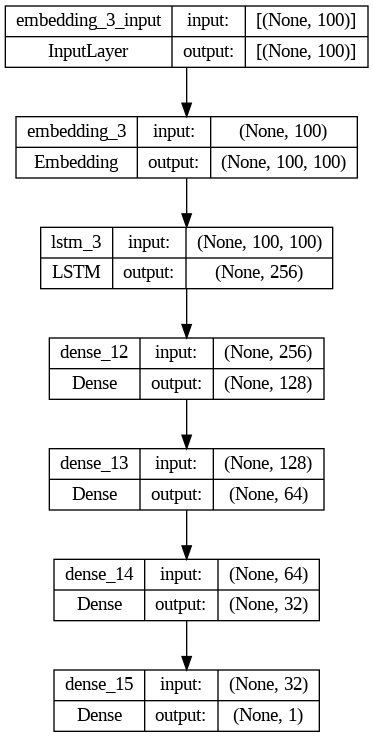

In [ ]:
from keras.utils import plot_model
plot_model(model , to_file='lstm_model.png' , show_shapes = True , show_layer_names = True)

### Training the model

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64 , callbacks=[early_stopping,lr_scheduler])

Epoch 1/10
257/257 [==============================] - 336s 1s/step - loss: 0.6703 - accuracy: 0.5720 - val_loss: 0.6850 - val_accuracy: 0.5633 - lr: 0.0010
Epoch 2/10
257/257 [==============================] - 305s 1s/step - loss: 0.6875 - accuracy: 0.5569 - val_loss: 0.6847 - val_accuracy: 0.5633 - lr: 0.0010
Epoch 3/10
257/257 [==============================] - 308s 1s/step - loss: 0.6866 - accuracy: 0.5567 - val_loss: 0.6820 - val_accuracy: 0.5633 - lr: 0.0010
Epoch 4/10
257/257 [==============================] - 299s 1s/step - loss: 0.6697 - accuracy: 0.5636 - val_loss: 0.6533 - val_accuracy: 0.5860 - lr: 0.0010
Epoch 5/10
257/257 [==============================] - 305s 1s/step - loss: 0.5865 - accuracy: 0.6991 - val_loss: 0.5709 - val_accuracy: 0.7033 - lr: 0.0010
Epoch 6/10
257/257 [==============================] - 305s 1s/step - loss: 0.5000 - accuracy: 0.7677 - val_loss: 0.5223 - val_accuracy: 0.7568 - lr: 0.0010
Epoch 7/10
257/257 [==============================] - 308s 1s/st

In [ ]:
model_path = "/content/drive/MyDrive/AI Datasets/Assignment/RNN Dataset/model_trained.h5"

In [ ]:
model.save(model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy,lr
0,0.670342,0.572047,0.684982,0.563308,0.001
1,0.687510,0.556857,0.684697,0.563308,0.001
2,0.686584,0.556674,0.682015,0.563308,0.001
3,0.669688,0.563629,0.653319,0.585997,0.001
4,0.586480,0.699122,0.570924,0.703342,0.001


In [ ]:
accuracy = metrics['accuracy']
val_accuracy = metrics['val_accuracy']
val_loss = metrics['val_loss']
loss = metrics['loss']
print("Accuracy" , accuracy)
print("Validation Accuracy" , val_accuracy)
print("Loss",loss)
print("Validation Loss",val_loss)

Accuracy 0    0.572047
1    0.556857
2    0.556674
3    0.563629
4    0.699122
5    0.767692
6    0.822474
7    0.869998
8    0.885859
9    0.925451
Name: accuracy, dtype: float64
Validation Accuracy 0    0.563308
1    0.563308
2    0.563308
3    0.585997
4    0.703342
5    0.756770
6    0.736521
7    0.763113
8    0.755306
9    0.744816
Name: val_accuracy, dtype: float64
Loss 0    0.670342
1    0.687510
2    0.686584
3    0.669688
4    0.586480
5    0.499963
6    0.411491
7    0.321572
8    0.283110
9    0.197750
Name: loss, dtype: float64
Validation Loss 0    0.684982
1    0.684697
2    0.682015
3    0.653319
4    0.570924
5    0.522256
6    0.670497
7    0.620854
8    0.634463
9    0.738092
Name: val_loss, dtype: float64


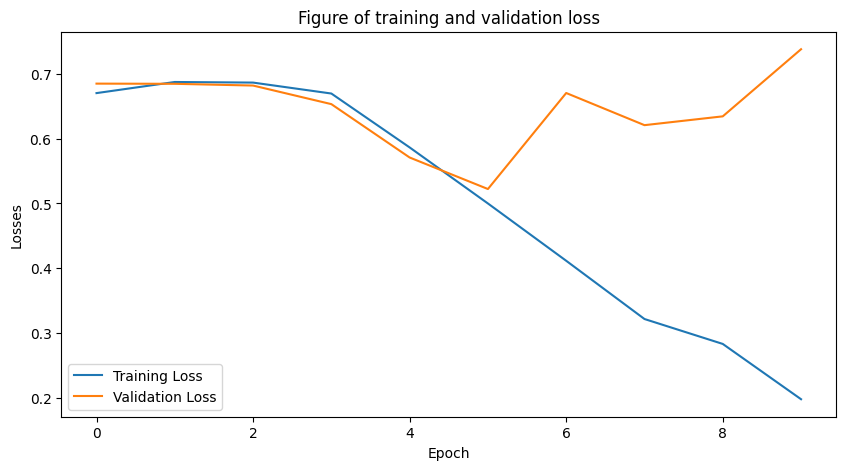

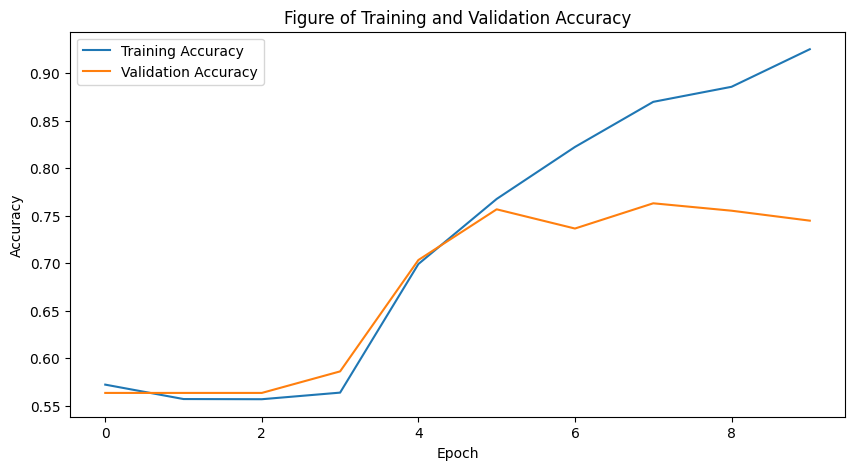

In [ ]:
from nltk.downloader import Label
plt.figure(figsize=(10,5))
plt.plot(loss , label="Training Loss")
plt.plot(val_loss , label="Validation Loss")
plt.title("Figure of training and validation loss")
plt.xlabel('Epoch')
plt.ylabel('Losses')
plt.legend()
plt.show()


plt.figure(figsize=(10,5))
plt.plot(accuracy , label="Training Accuracy")
plt.plot(val_accuracy , label="Validation Accuracy")
plt.title("Figure of Training and Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Evaluate the model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
from sklearn.metrics import accuracy_score
# loading model
model_load = load_model("/content/drive/MyDrive/AI Datasets/Assignment/RNN Dataset/model_trained.h5")

In [ ]:
loss, val_accuracy = model_load.evaluate(X_test, y_test)

In [ ]:
# Evaluating model
print("Validation Loss:", loss)
print("Validation Accuracy: {:.2f}%".format(val_accuracy * 100))
y_pred = model.predict(X_test)
y_pred = [1 if y > 0.5 else 0 for y in y_pred]
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy = {:.2f}%".format(accuracy * 100))

129/129 [==============================] - 19s 147ms/step - loss: 0.7381 - accuracy: 0.7448
Validation Loss: 0.7380915284156799
Validation Accuracy: 74.48%
129/129 [==============================] - 24s 186ms/step
Accuracy = 74.48%


### AUC-ROC Curve

In [ ]:
from sklearn.metrics import roc_curve
y_pred_prob = model_load.predict(X_test)
fpr , tpr , thresholds = roc_curve(y_test , y_pred_prob)

129/129 [==============================] - 35s 260ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

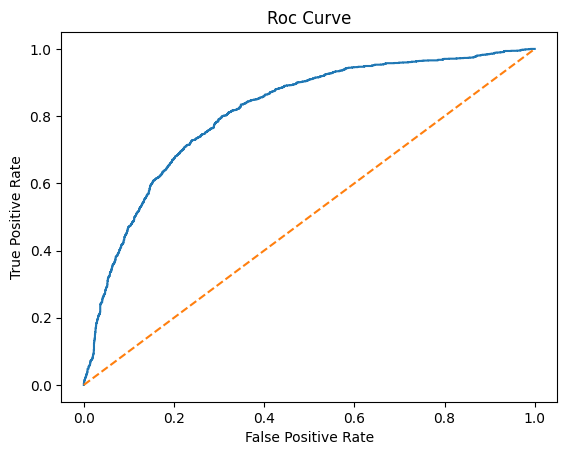

In [ ]:
plt.plot(fpr,tpr)
plt.plot([0,1] , [0,1] , linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Roc Curve')
plt.show

In [ ]:
from sklearn.metrics import roc_auc_score

score = roc_auc_score(y_test , y_pred_prob)
print("AUC Score:" , score)

AUC Score: 0.8110178533840134


### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
matrix = confusion_matrix(y_test , y_pred)

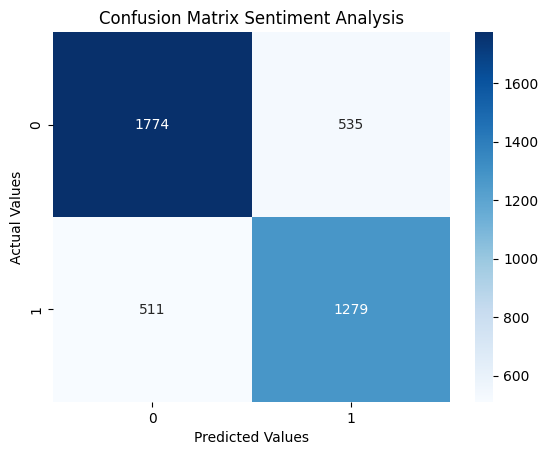

In [ ]:
sns.heatmap(matrix , annot =True , fmt = "d" , cmap = "Blues")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix Sentiment Analysis")
plt.show()

### Results and Prediction

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Processed_Reviews'])

In [ ]:
# input for our model
input_texts = [
    "nice hotel",
]

In [ ]:
input_tokenized = tokenizer.texts_to_sequences(input_texts)
input_padded = pad_sequences(input_tokenized, maxlen=max_len, padding='post')
input_predict = model_load.predict(input_padded)

In [ ]:
threshold = 0.5

In [ ]:
input_predict_binary = (input_predict > 1-threshold).astype('int32')

In [ ]:
# Displaying sentiment prediction value
for i in range(len(input_texts)):
    print("Input Text:", input_texts[i])
    print("Binary Prediction:", "Positive" if input_predict_binary[i][0] == 1 else "Negative")
    print()

1/1 [==============================] - 0s 150ms/step
Input Text: nice hotel
Binary Prediction: Positive

